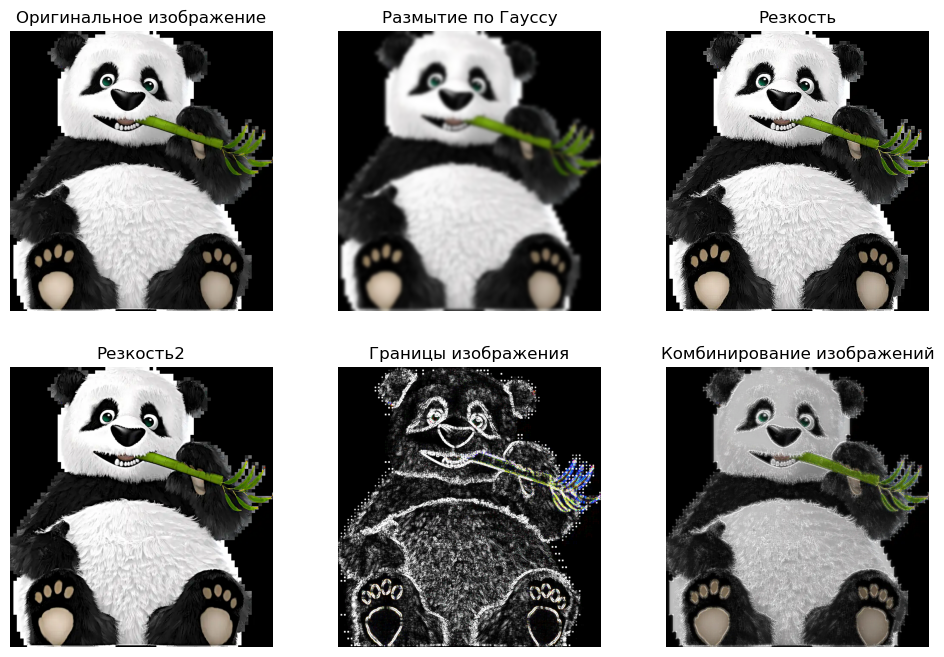

In [2]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

def show_images(image, blurred_image, sharpened_image, sharpened_image2, edges_of_image, combined_image):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.title('Оригинальное изображение')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Размытие по Гауссу')
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Резкость')
    plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Резкость2')
    plt.imshow(cv2.cvtColor(sharpened_image2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Границы изображения')
    plt.imshow(cv2.cvtColor(edges_of_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.title('Комбинирование изображений')
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

image = cv2.imread('image.jpeg')

#Размытие
blurred_image = cv2.GaussianBlur(image,(21,21), 0)

#Резкость 1 метод
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel)

#Резкость 2 метод
sharpened_image2 = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

#Границы
edges_of_image = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize = 5)
edges_of_image = cv2.convertScaleAbs(edges_of_image)

#Комбинирование изображений
combined_image = cv2.addWeighted(blurred_image, 0.5, edges_of_image, 0.5, 0)
combined_image = cv2.addWeighted(combined_image, 0.5, sharpened_image, 0.5, 0)

show_images(image, blurred_image,sharpened_image, sharpened_image2, edges_of_image, combined_image)